<h1 align=center><font size = 5>Predicting strength of concrete using regression model built from Neural Network</font></h1>

## Introduction
In this course project, I have built a regression model using the deep learning Keras library tp predict strength of concrete. I will experiment with increasing the number of training epochs and changing number of hidden layers and analyse how changing these parameters impacts the performance of the model.


# Part A

1. Configuration details
    - One hidden layer of 10 nodes, and a ReLU activation function

    - Use the adam optimizer and the mean squared error  as the loss function.

    - Randomly spliting the data into a training and test sets by holding 30% of the data for testing.

2. Training the model on the training data using 50 epochs.

3. Evaluating the model on the test data and computing the mean squared error between the predicted concrete strength and the actual concrete strength. The mean_squared_error function is used from Scikit-learn.

4. Repeating steps 1 - 3, 50 times, i.e., creating a list of 50 mean squared errors.

5. Calculating the mean and the standard deviation of the mean squared errors.

#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statistics
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jupyterlab/con

#### Downloading data

In [2]:
concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
concrete_data.shape

(1030, 9)

In [4]:
concrete_data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [5]:
concrete_data_columns = concrete_data.columns

predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']] # all columns except Strength
target = concrete_data['Strength'] # Strength column

In [6]:
predictors.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [7]:
target.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

In [8]:
n_cols = predictors.shape[1] # number of predictors
print (n_cols)

8


#### Splitting train-test data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.3, random_state = 0)

In [10]:
# define regression model
def regression_model():
    # create model
    model = Sequential()
    
    # One hidden layer of 10 nodes, and a ReLU activation function
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    
    # output node
    model.add(Dense(1))
    
    # compile model - adam optimizer and the mean squared error  as the loss function
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

#### Training model 50 times

In [11]:
mse=[]
for i in range(50):
    # build the model
    model = regression_model()
    # fit the model
    #model.fit(X_train, y_train, validation_split=0.3, epochs=50, verbose=2)
    model.fit(X_train, y_train,epochs=50, verbose=2)
    y_pred = model.predict(X_test) 
    tmp = mean_squared_error(y_test, y_pred)
    mse.append(tmp)

Epoch 1/50
 - 1s - loss: 89926.9905
Epoch 2/50
 - 0s - loss: 22173.3250
Epoch 3/50
 - 1s - loss: 5060.5145
Epoch 4/50
 - 0s - loss: 4055.4453
Epoch 5/50
 - 0s - loss: 3567.0269
Epoch 6/50
 - 0s - loss: 3176.1417
Epoch 7/50
 - 0s - loss: 2819.2322
Epoch 8/50
 - 0s - loss: 2483.7667
Epoch 9/50
 - 0s - loss: 2174.0148
Epoch 10/50
 - 0s - loss: 1908.1528
Epoch 11/50
 - 0s - loss: 1662.2774
Epoch 12/50
 - 0s - loss: 1448.6105
Epoch 13/50
 - 0s - loss: 1268.0228
Epoch 14/50
 - 0s - loss: 1107.5034
Epoch 15/50
 - 1s - loss: 977.9666
Epoch 16/50
 - 1s - loss: 878.6021
Epoch 17/50
 - 1s - loss: 799.2802
Epoch 18/50
 - 1s - loss: 729.2812
Epoch 19/50
 - 1s - loss: 671.0902
Epoch 20/50
 - 1s - loss: 623.1671
Epoch 21/50
 - 1s - loss: 583.1001
Epoch 22/50
 - 1s - loss: 554.9935
Epoch 23/50
 - 0s - loss: 522.1461
Epoch 24/50
 - 0s - loss: 494.8916
Epoch 25/50
 - 0s - loss: 473.5336
Epoch 26/50
 - 0s - loss: 445.2952
Epoch 27/50
 - 0s - loss: 432.1977
Epoch 28/50
 - 0s - loss: 414.0713
Epoch 29/50
 

In [12]:
print (mse)

[202.89065886664636, 201.7987152708783, 94.46034857975769, 418.72959432653346, 139.62073541753873, 157.87671847526065, 314.285694651171, 232.18380869966944, 120.0720378297341, 193.32518075446617, 671.586210438085, 110.26436143849675, 3558.2105168676107, 945.3723805440105, 983.6104982851593, 95.66315505558035, 719.8667054958939, 422.26129672277835, 727.3488719087816, 89.2131464697159, 265.9540317460962, 422.12781861550985, 193.83051422117677, 620.2346560815598, 146.05782587295732, 100.19576070661819, 100.53099797097231, 105.71116718161034, 88.08591132886437, 74.1211318765422, 158.63335648996275, 104.53578700421446, 136.53190762414403, 104.88019288489262, 294.86067862333834, 979.398726380167, 103.50972848997334, 84.59834823124105, 346.7036345501967, 199.91291614544784, 381.30066947779505, 302.6512946405742, 537.9452866304698, 238.32232788113376, 135.12917986107462, 81.39662291123516, 242.60456802137656, 251.75514493391333, 296.51928195558264, 175.42685664144685]


In [13]:
stdev_a  = '{0:.2f}'.format(statistics.stdev(mse))
print ('Standard Deviation: ', stdev_a)

mean_a  = '{0:.2f}'.format(statistics.mean(mse))
print ('Mean              : ', mean_a)

Standard Deviation:  522.41
Mean              :  353.44


# Part B

Repeating Part A after normalizing the data.

#### Normalizing data

In [14]:
predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


#### Splitting train-test data

In [15]:
X_train, X_test, y_train, y_test = train_test_split(predictors_norm, target, test_size = 0.3, random_state = 0)

In [ ]:
mse_nl = []
for i in range(50):
    # build the model
    model = regression_model()
    # fit the model
    model.fit(X_train, y_train, epochs=50, verbose=2)
    y_pred = model.predict(X_test) 
    tmp = mean_squared_error(y_test, y_pred)
    mse_nl.append(tmp)

Epoch 1/50
 - 6s - loss: 1586.0174
Epoch 2/50
 - 1s - loss: 1567.5929
Epoch 3/50
 - 0s - loss: 1549.3616
Epoch 4/50
 - 1s - loss: 1531.8771
Epoch 5/50
 - 1s - loss: 1514.6828
Epoch 6/50
 - 1s - loss: 1497.7697
Epoch 7/50
 - 1s - loss: 1480.5023
Epoch 8/50
 - 1s - loss: 1463.4880
Epoch 9/50
 - 1s - loss: 1445.8275
Epoch 10/50
 - 1s - loss: 1428.0437
Epoch 11/50
 - 1s - loss: 1409.8468
Epoch 12/50
 - 1s - loss: 1390.9687
Epoch 13/50
 - 1s - loss: 1371.3473
Epoch 14/50
 - 1s - loss: 1351.0401
Epoch 15/50
 - 1s - loss: 1329.7874
Epoch 16/50
 - 1s - loss: 1307.3955
Epoch 17/50
 - 1s - loss: 1283.3623
Epoch 18/50
 - 1s - loss: 1258.0672
Epoch 19/50
 - 1s - loss: 1231.4964
Epoch 20/50
 - 1s - loss: 1204.0645
Epoch 21/50
 - 1s - loss: 1174.8314
Epoch 22/50
 - 1s - loss: 1144.6944
Epoch 23/50
 - 1s - loss: 1113.3049
Epoch 24/50
 - 1s - loss: 1081.8266
Epoch 25/50
 - 1s - loss: 1048.8178
Epoch 26/50
 - 1s - loss: 1015.7581
Epoch 27/50
 - 1s - loss: 981.9227
Epoch 28/50
 - 1s - loss: 947.9108
Epo

In [16]:
print (mse_nl)

[602.7225821314385, 710.0820160004711, 580.4437204390579, 712.3852129889016, 841.741372538834, 823.7953935536854, 530.2585278872436, 618.4958345127428, 740.8843492886683, 900.3507284723372, 692.6080196340138, 559.8692806792361, 611.8368121657702, 744.8987314006278, 516.3895771434361, 560.5925877464962, 629.5488280119387, 1083.870977860708, 760.198209650175, 952.8865028618749, 809.9993672129914, 578.283556314375, 440.6400081911573, 645.8576592247493, 745.9918069232673, 652.9593524049108, 550.3581972306732, 535.9659642854983, 508.23174587328083, 549.7093663053017, 670.4824344067724, 521.5701015058501, 515.515213213599, 481.53058765805656, 517.2960109191314, 576.9494993659731, 640.8677038552063, 463.37799269039766, 488.85584161465994, 568.3913431186654, 897.6044969969622, 715.1397038897736, 732.2644017028679, 624.8296329373146, 789.3357855256784, 579.9747757205747, 954.6189331952119, 817.1650758530922, 647.7377083114634, 724.3776983211668]


In [66]:
stdev_b  = '{0:.2f}'.format(statistics.stdev(mse_nl))
print ('Standard Deviation: ', stdev_b)

mean_b  = '{0:.2f}'.format(statistics.mean(mse_nl))
print ('Mean              : ', mean_b)

Standard Deviation:  143.80
Mean              :  662.39


In [71]:
print ('Mean from part A: ', mean_b, '| Mean from part A: ', mean_a)

Mean from part A:  662.39 | Mean from part A:  879.19


# Part C

Repeating Part B but using 100 epochs this time for training.

In [22]:
mse_nl_ep_100=[]
for i in range(50):
    # build the model
    model = regression_model()
    # fit the model
    model.fit(X_train, y_train, epochs=100, verbose=2)
    y_pred = model.predict(X_test) 
    tmp = mean_squared_error(y_test, y_pred)
    mse_nl_ep_100.append(tmp)

Train on 504 samples, validate on 217 samples
Epoch 1/100
 - 23s - loss: 1575.3693 - val_loss: 1649.4791
Epoch 2/100
 - 1s - loss: 1562.1117 - val_loss: 1636.3104
Epoch 3/100
 - 1s - loss: 1549.0195 - val_loss: 1623.3762
Epoch 4/100
 - 1s - loss: 1536.2855 - val_loss: 1610.3459
Epoch 5/100
 - 1s - loss: 1523.3783 - val_loss: 1597.7412
Epoch 6/100
 - 1s - loss: 1510.8000 - val_loss: 1584.8709
Epoch 7/100
 - 1s - loss: 1498.2209 - val_loss: 1571.8169
Epoch 8/100
 - 1s - loss: 1485.2497 - val_loss: 1558.7512
Epoch 9/100
 - 1s - loss: 1472.1493 - val_loss: 1545.6664
Epoch 10/100
 - 1s - loss: 1459.0265 - val_loss: 1532.0339
Epoch 11/100
 - 1s - loss: 1445.5619 - val_loss: 1518.0550
Epoch 12/100
 - 1s - loss: 1431.9957 - val_loss: 1503.4882
Epoch 13/100
 - 1s - loss: 1417.9209 - val_loss: 1488.5439
Epoch 14/100
 - 1s - loss: 1403.3965 - val_loss: 1473.2398
Epoch 15/100
 - 1s - loss: 1388.6850 - val_loss: 1457.4037
Epoch 16/100
 - 1s - loss: 1373.4351 - val_loss: 1441.5141
Epoch 17/100
 - 1s

In [23]:
print (mse_nl_ep_100)

[195.84842930791385, 187.2897032705552, 203.745758642035, 176.02458799592088, 175.55471959894635, 178.26541310204396, 181.31456324258582, 167.83442302459753, 202.76390794118657, 209.79813089308814, 314.46314390530307, 272.9349857498218, 203.89391754093407, 391.34951772715124, 190.28125342996483, 294.39529307369327, 219.04524707226506, 166.0745484470327, 451.7754713645543, 179.92463114053604, 224.6115714697958, 179.20874257804243, 208.31473740893105, 176.53464801800112, 168.44262409903456, 217.20513763634193, 259.82414371561663, 190.32091538814495, 195.33680868182412, 175.28513057074437, 183.0015099766796, 190.10476141874625, 170.7782710332257, 174.9526211837878, 220.09056072410874, 197.21660279889872, 247.9815671735196, 207.63122527701367, 214.64266680433153, 180.25048672467076, 203.7800401047279, 181.72613251013536, 208.8928887475106, 221.53034017937074, 179.23179717880032, 217.57434288740282, 195.83145123801407, 179.21784068964635, 196.43430586484132, 190.70278282338506]


In [65]:
stdev_c  = '{0:.2f}'.format(statistics.stdev(mse_nl_ep_100))
print ('Standard Deviation: ', stdev_c)

mean_c  = '{0:.2f}'.format(statistics.mean(mse_nl_ep_100))
print ('Mean              : ', mean_c)

Standard Deviation:  53.83
Mean              :  210.38


In [72]:
print ('Mean from part B: ', mean_b, '| Mean from part C: ', mean_c)

Mean from part B:  662.39 | Mean from part C:  210.38


# Part D

Repeating part B but using a neural network with the following instead:

- Three hidden layers, each of 10 nodes and ReLU activation function.

#### Defining regression model with 3 hidden layers

In [24]:
def regression_model_3_HL():
    # create model
    model = Sequential()
   
    # adding 3 hidden layers 
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    
    #adding output node
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

#### Training model with 50 epochs

In [25]:
mse_nl_3_hl=[]
for i in range(50):
    # build the model
    model = regression_model_3_HL()
    # fit the model
    model.fit(X_train, y_train, epochs=50, verbose=2)
    y_pred = model.predict(X_test) 
    tmp = mean_squared_error(y_test, y_pred)
    mse_nl_3_hl.append(tmp)

Train on 504 samples, validate on 217 samples
Epoch 1/50
 - 30s - loss: 1502.3249 - val_loss: 1573.6088
Epoch 2/50
 - 1s - loss: 1476.0890 - val_loss: 1544.8324
Epoch 3/50
 - 1s - loss: 1442.0581 - val_loss: 1504.4904
Epoch 4/50
 - 1s - loss: 1393.4166 - val_loss: 1447.9549
Epoch 5/50
 - 1s - loss: 1327.4530 - val_loss: 1371.0989
Epoch 6/50
 - 1s - loss: 1242.0286 - val_loss: 1269.9076
Epoch 7/50
 - 1s - loss: 1131.6500 - val_loss: 1144.1980
Epoch 8/50
 - 1s - loss: 999.6895 - val_loss: 994.0536
Epoch 9/50
 - 1s - loss: 848.6130 - val_loss: 832.3164
Epoch 10/50
 - 1s - loss: 698.4096 - val_loss: 664.5864
Epoch 11/50
 - 1s - loss: 555.7281 - val_loss: 517.8994
Epoch 12/50
 - 1s - loss: 437.6597 - val_loss: 408.1189
Epoch 13/50
 - 1s - loss: 358.9611 - val_loss: 330.3178
Epoch 14/50
 - 1s - loss: 309.0028 - val_loss: 285.9190
Epoch 15/50
 - 1s - loss: 281.2929 - val_loss: 260.0836
Epoch 16/50
 - 1s - loss: 262.8008 - val_loss: 243.7983
Epoch 17/50
 - 1s - loss: 249.7097 - val_loss: 234.4

In [26]:
print (mse_nl_3_hl)

[142.69895540707284, 135.35306402723756, 144.76114481758418, 140.1921309042976, 133.21646879519642, 149.32843819658882, 146.6906687443094, 147.83207383315897, 138.1929931722351, 144.1980219159898, 146.526271875901, 139.4154235154293, 138.19817180852982, 129.99978146040806, 134.41905204115542, 113.71234207585695, 140.0808626142882, 143.60210484725692, 131.48579974544677, 135.31782670895174, 119.51666539287984, 117.1197106497253, 132.0111435887915, 129.3570181996077, 118.84074816921843, 119.0068051679231, 119.03160458850299, 138.66279127091045, 139.9383225224576, 140.73810312563418, 120.66528522097819, 130.05437778574924, 131.96718992392968, 145.7131347507333, 122.76255238962042, 148.32380452800604, 112.30833570193116, 134.95636143122488, 137.84716060434266, 127.77015016810138, 142.07969007201623, 135.30754777749542, 138.03696775704654, 139.62901883643866, 131.38620521580282, 123.97476197146902, 140.02158941740595, 135.28731297538897, 135.4327057346889, 134.78998806743408]


In [64]:
stdev_d  = '{0:.2f}'.format(statistics.stdev(mse_nl_3_hl))
print ('Standard Deviation: ', stdev_d)

mean_d  = '{0:.2f}'.format(statistics.mean(mse_nl_3_hl))
print ('Mean              : ', mean_d)

Standard Deviation:  9.54
Mean              :  134.36


In [70]:
print ('Mean from part C: ', mean_c, '| Mean from part D: ', mean_d)

Mean from part C:  210.38 Mean from part D:  134.36


# Conclusion

## Plotting MSE errors recorded after training unnder different conditions

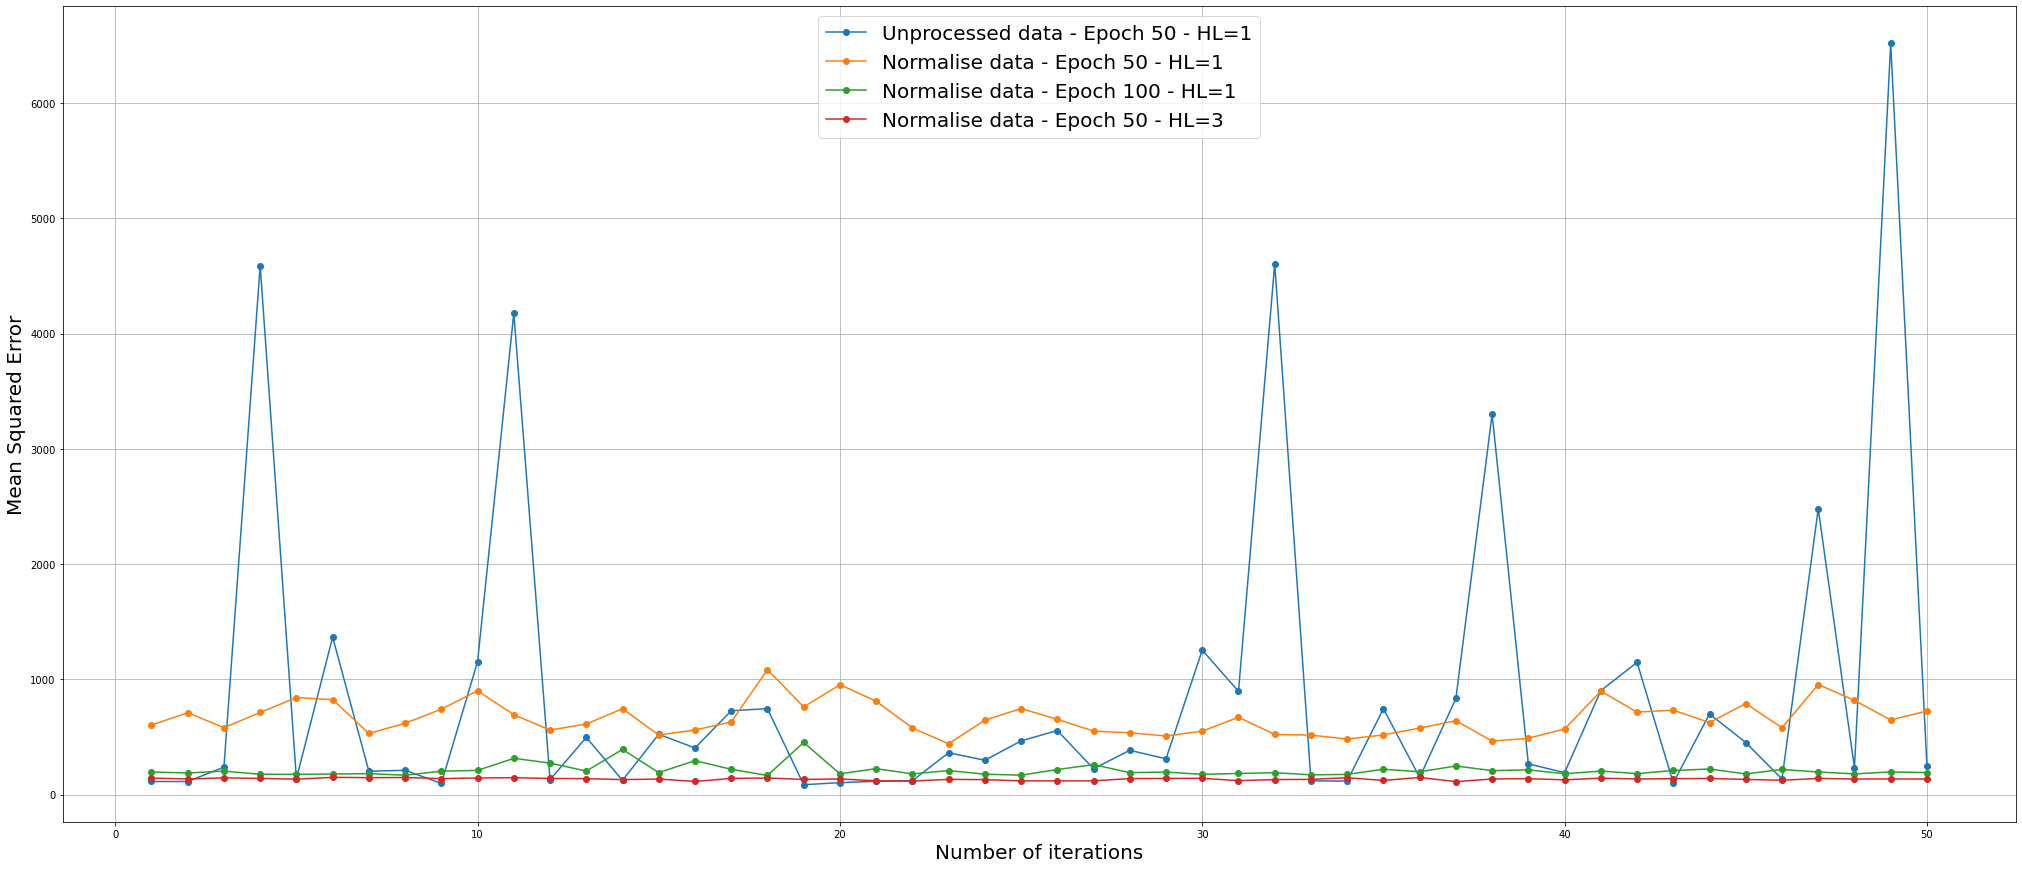

In [45]:
# importing package 
import matplotlib.pyplot as plt 
import numpy as np 
  
# create data 
y = list (range(1,51))

plt.figure(figsize=(35,15))
# plot lines 
plt.plot(y, mse, label = "Unprocessed data - Epoch 50 - HL=1", marker='o') 
plt.plot(y, mse_nl, label = "Normalise data - Epoch 50 - HL=1", marker='o') 
plt.plot(y, mse_nl_ep_100, label = "Normalise data - Epoch 100 - HL=1", marker='o') 
plt.plot(y, mse_nl_3_hl, label = "Normalise data - Epoch 50 - HL=3", marker='o')

plt.xlabel('Number of iterations', fontsize=20)
plt.ylabel('Mean Squared Error', fontsize=20)

plt.grid(True)
plt.legend(loc = 'upper center', fontsize=20) 

plt.show()